![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Inferential statistics - ANOVA

Note: The following lab is divided in 2 sections which represent activities 3 and 4.

## Part 1

In this activity, we will look at another example. Your task is to understand the problem and write down all the steps to set up ANOVA. After the next lesson, we will ask you to solve this problem using Python. Here are the steps that you would need to work on:
    - Null hypothesis
    - Alternate hypothesis
    - Level of significance
    - Test statistic
    - P-value
    - F table

### Context

Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the etching rate by the machine. You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power. You can find the data `anova_lab_data.xlsx` file in the `files_for_lab` folder  

- State the null hypothesis
- State the alternate hypothesis
- What is the significance level
- What are the degrees of freedom of model, error terms, and total DoF

Data was collected randomly and provided to you in the table as shown: [link to the image - Data](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.05/7.05-lab_data.png)


![Lab Data](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.05/7.05-lab_data.png)

In [48]:
n = 15 # Observations
ng = 3 # Number of groups
df1 = 2 # degrees of freedom 1 = number of groups (160W, 180W and 200W) - 1)
df2 = 12 # degrees of freedom 2 = number of observations - number of categories

- State the null hypohtesis (H0) --> there is no significant difference among the **means** of each group.
- State the alternative hypohtesis (Ha) --> there is a significant difference among the **means** of each group.
- What is the significance level? **The alpha** (α) --> we will use 0.05 (5%)
- What are the degrees of freedom of model, error terms, and total DoF
    * Degrees of freedom:
        * df1 = 2
        * df2 = 12
    * Total DoF: 14 (number of observations - 1)
    * Error terms: 12. From the python calculation, sum_eq, mean_eq in residuals
    
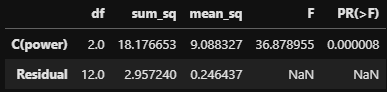

## Part 2

- In this section, use Python to conduct ANOVA.
- What conclusions can you draw from the experiment and why?

In [28]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_excel('anova_lab_data.xlsx')
df.head(3)

Power   Etching Rate
0  160 W          5.43
1  180 W          6.24
2  200 W          8.79

In [30]:
df.columns # I got an error before, Power has an empty space

Index(['Power ', 'Etching Rate'], dtype='object')

In [51]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower() # Obsessive is me, we standarize the columns before proceeding 
df.columns

Index(['power', 'etching_rate'], dtype='object')

In [52]:
df.groupby('power').agg(np.mean)

etching_rate
power              
160 W         5.792
180 W         6.238
200 W         8.318

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('etching_rate ~ C(power)', data=df).fit()
sm.stats.anova_lm(model)

df     sum_sq   mean_sq          F    PR(>F)
C(power)   2.0  18.176653  9.088327  36.878955  0.000008
Residual  12.0   2.957240  0.246437        NaN       NaN

- With 95% of confidence we have enough evidence (p-value is way less than 0.05) to discard the null hypothesis
- So, the mean of etching rates at different power levels of the plasma beam are not the same.